This notebook contains notes I made while studying topics from the Python Data Science Handbook by Jake Vanderplas. His Github repo of the book is [here](https://github.com/jakevdp/PythonDataScienceHandbook). I forked the repo, and that clone is located on my local filesystem at 
```
~/github/jakevdp_PythonDataScienceHandbook
```

# 3.01 - Introducing Pandas objects

## The Pandas Index object (p. 105)

Index objects are immutable. They can also be treated as ordered sets because 

> (p106) The `Index` object follows many of the conventions used by Python's built-in `set` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way.

In [49]:
import pandas as pd
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

# Chapter 5: Machine Learning

# In Depth: Linear Regression

These are described as standard inputs for linear regression:

In [50]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Let's create some data and plot it:

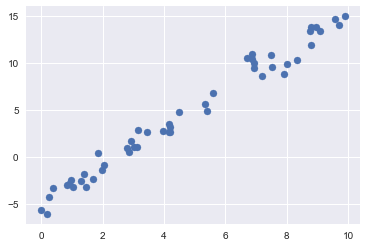

In [51]:
rng = np.random.RandomState(1) # GJL: setting a seed
x = 10 * rng.rand(50)  # creates 50 random numbers in (0,10)
y = 2 * x - 5 + rng.randn(50) # linear relationship + Gaussian noise
plt.scatter(x,y);

Let's fit a regression:

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

What is `model`? Well, remember **everything in Python is an object**. Try `help(model)` to see all the different elements of `model`, which, being an object, is an instance of the class `LinearRegression`.

It seems obvious that the following `model.fit()` call modifies the fields of the `model` instance in place. That may `model` can be further used in later lines.

In [53]:
model.fit(x[:, np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

What is the purpose of `np.newaxis`? See [here](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it). Basically,

> `np.newaxis` might come in handy when you want to *explicitly* convert an 1D array to either a *row vector* or a *column vector*

In my case above, `x[:, np.newaxis]` makes `x` into a **column vector**. I'm not sure why the same treatment isn't required for `y`.

# Misc notes

## Universal functions and array broadcasting

This info is also covered in PDSH. Broadcasting starts on p. 63, where it's defined as 

> Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

[This page](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#ufuncs-broadcasting) of the Scipy documentation describes universal functions and array broadcasting. Basically array broadcasting is the automatic adjustment of array sizes and dimensions that is done in order to make a set of arrays the same size. Here's a really good example from that page.

*Example:*
If `a.shape` is (5,1), `b.shape` is (1,6), `c.shape` is (6,) and `d.shape` is () so that `d` is a scalar, then `a`, `b`, `c`, and `d` are all broadcastable to dimension (5,6); and

- `a` acts like a (5,6) array where `a[:,0]` is broadcast to the other columns,
- `b` acts like a (5,6) array where `b[0,:]` is broadcast to the other rows,
- `c` acts like a (1,6) array and therefore like a (5,6) array where `c[:]` is broadcast to every row, and finally,
- `d` acts like a (5,6) array where the single value is repeated.

# Orphaned notes (forgot what part of PDSH I was looking at)

- In Python, everything's an object, which means many "things" have two ways of calling related methods: the object-oriented way and the non object-oriented way. 
    - _I thought the good code for this idea was around the Pandas Index object (p105 or so), but on second look, I can't find it there._